In [48]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import tempfile
import seaborn as sns
sns.set(style="darkgrid")

plt.rc('font', size=24, family='serif')
plt.style.use('tableau-colorblind10')
%matplotlib inline
sns.set(rc={'figure.figsize':(10,8)})

import logging
logging.getLogger().setLevel(logging.INFO)

from banditpylib import trials_to_dataframe
from banditpylib.bandits import LinearBandit
from banditpylib.arms import GaussianArm
from banditpylib.protocols import SinglePlayerProtocol
from banditpylib.learners.linear_bandit_learner import LinUCB
from banditpylib.learners.mab_learner import UCB

In [25]:
num_arms = 10
horizon = 2000
delta = 1 / horizon
lambda_reg = 1e-3

In [26]:
features = [np.random.normal(0, size=5) for _ in range(num_arms)]
for i in range(len(features)):
    features[i] = features[i] / np.linalg.norm(features[i])

theta = np.random.normal(0, size=5)

In [27]:
bandit = LinearBandit(features, theta)
learners = [LinUCB(features, delta, lambda_reg), UCB(num_arms)]

In [28]:
intermediate_horizons = list(range(0, horizon+1, 50))
temp_file = tempfile.NamedTemporaryFile()

In [29]:
game = SinglePlayerProtocol(bandit, learners)

In [30]:
game.play(200, temp_file.name, intermediate_horizons=intermediate_horizons, horizon=horizon)

INFO:absl:start linucb's play with linear_bandit
INFO:absl:linucb's play with linear_bandit runs 20.40 seconds.
INFO:absl:start ucb's play with linear_bandit
INFO:absl:ucb's play with linear_bandit runs 12.72 seconds.


In [31]:
trials_df = trials_to_dataframe(temp_file.name)

In [32]:
trials_df.head()

,rounds,total_actions,regret,other,bandit,learner
0,0,0,0.000000,0.0,linear_bandit,linucb
1,50,50,6.240895,0.0,linear_bandit,linucb
2,100,100,24.277716,0.0,linear_bandit,linucb
3,150,150,32.066570,0.0,linear_bandit,linucb
4,200,200,43.358860,0.0,linear_bandit,linucb


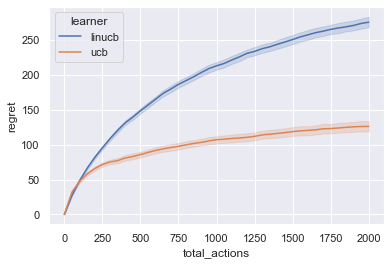

In [33]:
sns.lineplot(x='total_actions', y='regret', hue='learner', data=trials_df)
plt.show()

In [ ]:
sns.lineplot(x='T', y='regret', hue='learner', data=trials_df)
plt.show()

/var/folders/79/vy4wsm0121j9vnf3ny23l8ywx7grll/T/ipykernel_3935/3293647932.py:7: RuntimeWarning: divide by zero encountered in log
  y2 = np.sqrt(K*x*np.log(x))
/var/folders/79/vy4wsm0121j9vnf3ny23l8ywx7grll/T/ipykernel_3935/3293647932.py:7: RuntimeWarning: invalid value encountered in multiply
  y2 = np.sqrt(K*x*np.log(x))
/var/folders/79/vy4wsm0121j9vnf3ny23l8ywx7grll/T/ipykernel_3935/3293647932.py:8: RuntimeWarning: divide by zero encountered in log
  y3 = np.sqrt(S*x*np.log(x))
/var/folders/79/vy4wsm0121j9vnf3ny23l8ywx7grll/T/ipykernel_3935/3293647932.py:8: RuntimeWarning: invalid value encountered in multiply
  y3 = np.sqrt(S*x*np.log(x))


Text(0, 0.5, '$E[R(T)]}$')

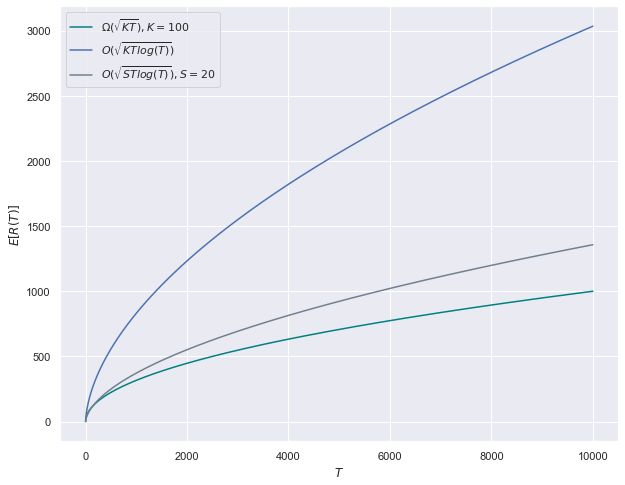

In [77]:
K = 100
T = 10000
S= 20

x = np.array(range(T))
y = np.sqrt(K*x)
y2 = np.sqrt(K*x*np.log(x))
y3 = np.sqrt(S*x*np.log(x))
plt.plot(x, y, 'teal')
plt.plot(x, y2)
plt.plot(x, y3, 'slategrey')
plt.legend([r'$\Omega(\sqrt{KT}), K=100$', r'$O(\sqrt{KTlog(T)})$', r'$O(\sqrt{STlog(T)}), S=20$'])
plt.xlabel(r'$T$')
plt.ylabel('$E[R(T)]}$')
